## Dataset

- **Train Dataset**: 2007–2017 data (public target).  
- **Test Dataset**: 2018 data (hidden target).

You can download both datasets from the provided Google Drive link: [dataset](https://drive.google.com/drive/folders/1NVQtamDRuGuAIZCRfidvnlSPH1-xLGlG?usp=sharing)
A data dictionary is available here:  
[Model Catalog (Variable Descriptions)](https://docs.google.com/spreadsheets/d/14FaRVNdObbYPskGK5UF_MmNW9d3WMjF3biu9R0V2zzw)

In [1]:
import os
os.chdir('../../')
os.getcwd()

'/Users/henriquecosta/workspace/studies/modern-ml'

In [2]:
import pandas as pd 

In [3]:
df_test = pd.read_parquet('./case/data/processed/lending_club_case_case_test_dataset.parquet')
df_train = pd.read_parquet('./case/data/processed/lending_club_case_train_dataset.parquet')

In [4]:
pwd

'/Users/henriquecosta/workspace/studies/modern-ml'

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1765426 entries, 0 to 2925491
Columns: 142 entries, id to default
dtypes: Int16(54), Int32(15), Int64(15), category(22), datetime64[ns](9), float16(23), float32(4)
memory usage: 1.0 GB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538826 entries, 472065 to 1082981
Columns: 141 entries, id to debt_settlement_flag
dtypes: Int16(54), Int32(15), Int64(15), category(22), datetime64[ns](9), float16(22), float32(4)
memory usage: 389.5 MB


In [7]:
df_train.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,default
0,1077501,5000,5000,4976.0,36,0.106506,162.87500,B,B2,NaN,...,NaT,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,0.0
1,1077430,2500,2500,2500.0,60,0.152710,59.84375,C,C4,Ryder,...,NaT,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,1.0
2,1077175,2400,2400,2400.0,36,0.159546,84.31250,C,C5,NaN,...,NaT,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,0.0
3,1076863,10000,10000,10000.0,36,0.134888,339.25000,C,C1,AIR RESOURCES BOARD,...,NaT,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,0.0
4,1075358,3000,3000,3000.0,60,0.126953,67.81250,B,B5,University Medical Group,...,NaT,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N,0.0


In [8]:
df_test.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
472065,130607974,14100,14100,14096.0,36,0.238647,552.00,E,E2,Sr Clinical Research Associate,...,NaT,NaT,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N
472066,130932509,20000,20000,20000.0,60,0.140747,466.00,C,C3,TEACHER,...,NaT,NaT,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N
472067,130938452,28625,28625,28624.0,60,0.218506,788.00,D,D5,Psychologist,...,NaT,NaT,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N
472068,130950844,20000,20000,20000.0,60,0.099182,424.25,B,B2,Manager,...,NaT,NaT,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N
472069,130966126,15000,15000,15000.0,60,0.174683,376.50,D,D1,CCAP Administrator,...,NaT,NaT,NaT,-1,-1,NaN,-1.0,-1.0,-1.0,N


In [9]:
df_train['default'].isnull().mean()

0.1029666494092644

## Avoid Data Leakage
When building a predictive model for default, you must be especially careful not to “leak” into your training set any information that wouldn’t be available at the time you’d need to make a prediction—that is, before the loan has been issued and the borrower’s payment behavior (or hardship) has unfolded. In the Lending Club dataset many columns record events or performance metrics that occur after the loan is funded. Using them would give your model access to information that is only known in hindsight and would result in overly optimistic (and unrealistic) performance.

Below are examples of features that should be **removed** because they either directly reflect the outcome (or are computed after the outcome is known) or summarize post‐origination payment behavior:

- **Unique identifiers or metadata that are not predictive:**  
  - **id:** A unique identifier that does not contain signal about default.  
  - **url:** A URL to the loan page is not useful for prediction.

- **Post‐issuance or repayment performance measures (leakage from the future):**  
  - **loan_status:** This directly indicates the outcome (whether the loan defaulted or not) and is the very target you’re trying to predict.  
  - **loan_amount:** Although related to the loan amount, these fields are updated as funding occurs and can be influenced by post-application factors.  
  - **out_prncp & out_prncp_inv:** The remaining outstanding principal (for the total and the investors’ portion) is a post-funding metric that changes over time.  
  - **total_pymnt & total_pymnt_inv:** Total payments received (overall and for investors) accumulate over the life of the loan and are not known at application time.  
  - **total_rec_prncp, total_rec_int, & total_rec_late_fee:** These fields record the principal, interest, and late fees actually received—all outcomes that occur after origination.  
  - **recoveries & collection_recovery_fee:** These are only recorded after a loan has entered default and been partially recovered.  
  - **last_pymnt_d & last_pymnt_amnt:** The date and amount of the last payment are only known after payments have been made.  
  - **next_pymnt_d:** The next scheduled payment date reflects a post-funding schedule.  
  - **last_credit_pull_d:** This is the date of the most recent credit pull, which is updated as the loan progresses.  
  - **last_fico_range_high & last_fico_range_low:** Updated FICO score ranges (from later credit pulls) are not available at the time of application.

- **Hardship-related features (reflecting events after origination):**  
  - **hardship_flag, hardship_type, hardship_reason, hardship_status:** These indicate whether (and how) a borrower entered a hardship plan—a condition that occurs after the loan is made.  
  - **deferral_term, hardship_amount, hardship_start_date, hardship_end_date, payment_plan_start_date, hardship_length, hardship_dpd, hardship_loan_status:** All of these describe the details and timing of hardship payment plans or adjustments that are only known after the loan’s performance is observed.  
  - **orig_projected_additional_accrued_interest, hardship_payoff_balance_amount, hardship_last_payment_amount:** These fields are calculated based on the hardship period and are not available when making the credit decision.

---

### Final Comma‐Separated List of Features to Remove

```
id, url, loan_status, loan_amount, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, last_fico_range_high, last_fico_range_low, hardship_flag, hardship_type, hardship_reason, hardship_status, deferral_term, hardship_amount, hardship_start_date, hardship_end_date, payment_plan_start_date, hardship_length, hardship_dpd, hardship_loan_status, orig_projected_additional_accrued_interest, hardship_payoff_balance_amount, hardship_last_payment_amount
```

---

### Reasoning Recap

- **Identifiers/Metadata:** These provide no predictive signal.
- **Outcome/Post-Origination Variables:** Any variable that is updated or computed after the loan is issued (or reflects how the borrower has behaved since origination) would leak future information into your training process.
- **Hardship Variables:** These are inherently linked to later performance and thus cannot be used for prediction at the time of loan application.

By removing these features, your model will be forced to rely only on information available at application time, leading to a more realistic and generalizable prediction of the probability of default.


In [10]:
data_dict = pd.read_csv('./case/data/raw/lending_club_clean_dict.csv')

In [11]:
for _, row in data_dict.iterrows():
    print(f'- {row.column}: {row.description}')

- id: A unique LC assigned ID for the loan listing.
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- funded_amnt: The total amount committed to that loan at that point in time.
- funded_amnt_inv: The total amount committed by investors for that loan at that point in time.
- term: The number of payments on the loan. Values are in months and can be either 36 or 60.
- int_rate: Interest Rate on the loan
- installment: The monthly payment owed by the borrower if the loan originates.
- grade: LC assigned loan grade
- sub_grade: LC assigned loan subgrade
- emp_title: The job title supplied by the Borrower when applying for the loan.*
- emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- home_ownership: The home ownership status provided by the borrower during regi

In [12]:
DROP_COLS = [
    "url", 
    "loan_status", 
    "loan_amnt", 
    "out_prncp", 
    "out_prncp_inv", 
    "total_pymnt", 
    "total_pymnt_inv", 
    "total_rec_prncp", 
    "total_rec_int", 
    "total_rec_late_fee", 
    "recoveries", 
    "collection_recovery_fee", 
    "last_pymnt_d", 
    "last_pymnt_amnt", 
    "next_pymnt_d", 
    "last_credit_pull_d", 
    "last_fico_range_high", 
    "last_fico_range_low", 
    "hardship_flag", 
    "hardship_type", 
    "hardship_reason", 
    "hardship_status", 
    "deferral_term", 
    "hardship_amount", 
    "hardship_start_date", 
    "hardship_end_date", 
    "payment_plan_start_date", 
    "hardship_length", 
    "hardship_dpd", 
    "hardship_loan_status", 
    "orig_projected_additional_accrued_interest", 
    "hardship_payoff_balance_amount", 
    "hardship_last_payment_amount",
    "last_pymnt_d",
    "next_pymnt_d",
    "last_credit_pull_d",
]

In [13]:
df_train_proc = df_train.drop(columns=DROP_COLS)
df_test_proc = df_test.drop(columns=DROP_COLS)

In [14]:
df_train_proc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1765426 entries, 0 to 2925491
Columns: 109 entries, id to default
dtypes: Int16(51), Int32(12), Int64(15), category(15), datetime64[ns](3), float16(11), float32(2)
memory usage: 750.5 MB


## Remove instances with missing target labels: 
Since the model requires a known outcome (default flag) for each training example, you should remove any rows in the training set where the default flag is missing. Without the target, these instances cannot contribute to learning the correct relationship between the features and the outcome.

In [15]:
maks_target_null = df_train_proc['default'].isnull()
df_train_proc = df_train_proc.loc[~maks_target_null]

## Separate Numeriacal and Categorical Feautures

In [16]:
CATEGORICAL_FEATURES = df_train_proc.select_dtypes(include='category').columns.tolist()
CATEGORICAL_FEATURES

['grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type',
 'verification_status_joint',
 'debt_settlement_flag']

In [17]:
df_train_proc['default'].dtype

dtype('float16')

In [18]:
INTEGER_FEATURES = df_train_proc.select_dtypes(include=[int, 'int16']).columns.tolist()
FLOAT_FEATURES = df_train_proc.drop(columns=['default']).select_dtypes(include=['float16', 'float32']).columns.tolist()
DATETIME_FEATURES = df_train_proc.select_dtypes(include='datetime64').columns.tolist()

In [19]:
assert len(INTEGER_FEATURES + FLOAT_FEATURES + CATEGORICAL_FEATURES + DATETIME_FEATURES) == (df_train_proc.shape[1] - 1)  

## Check Features

In [20]:
pd.options.display.max_colwidth = None
data_dict.loc[data_dict.column.isin(FLOAT_FEATURES), ['column', 'description']]

,column,description
3,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
5,int_rate,Interest Rate on the loan
6,installment,The monthly payment owed by the borrower if the loan originates.
12,annual_inc,The self-reported annual income provided by the borrower during registration.
22,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
33,revol_util,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
55,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
56,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"
77,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.
103,pct_tl_nvr_dlq,Percent of trades never delinquent


In [21]:
df_train_proc['default'] = df_train_proc['default'].astype('int')

# Remove float16
df_train_proc[FLOAT_FEATURES] = df_train_proc[FLOAT_FEATURES].astype('float32')
df_test_proc[FLOAT_FEATURES] = df_test_proc[FLOAT_FEATURES].astype('float32')

In [22]:
df_train_proc[FLOAT_FEATURES].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1583646 entries, 0 to 2925491
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   funded_amnt_inv     1583646 non-null  float32
 1   int_rate            1583646 non-null  float32
 2   installment         1583646 non-null  float32
 3   annual_inc          1583646 non-null  float32
 4   dti                 1583646 non-null  float32
 5   revol_util          1582644 non-null  float32
 6   annual_inc_joint    1583646 non-null  float32
 7   dti_joint           1583646 non-null  float32
 8   bc_util             1583646 non-null  float32
 9   pct_tl_nvr_dlq      1583646 non-null  float32
 10  percent_bc_gt_75    1583646 non-null  float32
 11  sec_app_revol_util  1583646 non-null  float32
dtypes: float32(12)
memory usage: 84.6 MB


In [23]:
(
    df_train_proc.groupby('default')[FLOAT_FEATURES]
    .quantile(q=[.25, .5, .75]).T
    .assign(diff=lambda x: x[(1, .5)] - x[(0, .5)])
    .sort_values('diff')
)

default                        0                                         1  \
                            0.25           0.5          0.75          0.25   
annual_inc          47000.000000  65000.000000  93000.000000  44000.000000   
pct_tl_nvr_dlq         90.000000     97.125000    100.000000     90.000000   
annual_inc_joint     5692.509766   5692.509766   5692.509766   5692.509766   
dti_joint              -1.000000     -1.000000     -1.000000     -1.000000   
sec_app_revol_util     -1.000000     -1.000000     -1.000000     -1.000000   
int_rate                0.091675      0.121216      0.150513      0.122925   
revol_util              0.332031      0.518066      0.704102      0.373047   
dti                    11.617188     17.328125     23.703125     13.546875   
bc_util                34.187500     60.500000     83.375000     40.312500   
percent_bc_gt_75        0.000000     40.000000     71.375000     14.296875   
installment           240.875000    367.250000    572.000000    276.000000   
funded_amnt_inv      7500.000000  12000.000000  20000.000000   9000.000000   

default                                                diff  
                             0.5          0.75               
annual_inc          60000.000000  85000.000000 -5000.000000  
pct_tl_nvr_dlq         96.875000    100.000000    -0.250000  
annual_inc_joint     5692.509766   5692.509766     0.000000  
dti_joint              -1.000000     -1.000000     0.000000  
sec_app_revol_util     -1.000000     -1.000000     0.000000  
int_rate                0.149902      0.184937     0.028687  
revol_util              0.553223      0.728027     0.035156  
dti                    19.734375     26.281250     2.406250  
bc_util                66.125000     87.000000     5.625000  
percent_bc_gt_75       50.000000     80.000000    10.000000  
installment           402.500000    604.000000    35.250000  
funded_amnt_inv     14400.000000  20656.000000  2400.000000

In [24]:
df_train_proc[FLOAT_FEATURES].describe().T

,count,mean,std,min,25%,50%,75%,max
funded_amnt_inv,1583646.0,14453.821289,8767.901367,0.000000,7924.000000,12000.000000,20000.000000,4.000000e+04
int_rate,1583646.0,0.131510,0.047244,0.053192,0.097473,0.126953,0.158813,3.098145e-01
installment,1583646.0,437.730072,262.254700,4.929688,248.125000,374.000000,578.500000,1.720000e+03
annual_inc,1583646.0,76734.609375,122283.335938,0.000000,46000.000000,65000.000000,91000.000000,1.100000e+08
dti,1583646.0,18.428242,11.122922,-2.000000,11.937500,17.765625,24.234375,9.990000e+02
revol_util,1582644.0,0.521655,0.243219,0.000000,0.340088,0.524902,0.708984,8.921875e+00
annual_inc_joint,1583646.0,8006.492188,17716.316406,5692.509766,5692.509766,5692.509766,5692.509766,1.300000e+06
dti_joint,1583646.0,-0.580217,3.053777,-1.000000,-1.000000,-1.000000,-1.000000,6.950000e+01
bc_util,1583646.0,57.834538,30.005632,-1.000000,35.312500,61.593750,84.125000,3.395000e+02
pct_tl_nvr_dlq,1583646.0,89.950630,21.114038,-1.000000,90.000000,97.125000,100.000000,1.000000e+02


In [25]:
df_train_proc[CATEGORICAL_FEATURES].nunique()

grade                             7
sub_grade                        35
emp_title                    420583
emp_length                       11
home_ownership                    6
verification_status               3
pymnt_plan                        1
purpose                          14
title                         61685
zip_code                        946
addr_state                       51
initial_list_status               2
application_type                  2
verification_status_joint         3
debt_settlement_flag              2
dtype: int64

In [26]:
pd.options.display.max_colwidth = None
data_dict.loc[data_dict.column.isin(CATEGORICAL_FEATURES), ['column', 'description']]

,column,description
7,grade,LC assigned loan grade
8,sub_grade,LC assigned loan subgrade
9,emp_title,The job title supplied by the Borrower when applying for the loan.*
10,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
11,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
13,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
16,pymnt_plan,Indicates if a payment plan has been put in place for the loan
18,purpose,A category provided by the borrower for the loan request.
19,title,The loan title provided by the borrower
20,zip_code,The first 3 numbers of the zip code provided by the borrower in the loan application.


In [27]:
df_train_proc['emp_title'].isnull().mean()

0.06331718073357304

In [28]:
df_train_proc['title']

0                         Computer
1                             bike
2             real estate business
3                         personel
4                         Personal
                    ...           
2925487                      Other
2925488         Debt consolidation
2925489         Debt consolidation
2925490    Credit card refinancing
2925491         Debt consolidation
Name: title, Length: 1583646, dtype: category
Categories (63155, object): ['\tcredit_card', '\tdebt_consolidation', '\thouse', '\tother', ..., 'zxcvb', '~Life Reorganization~', '~Summer Fun~', 'îîMY FIRST CAR îî']

In [29]:
low_card = df_train_proc[CATEGORICAL_FEATURES].nunique() < 10
low_card[low_card]

grade                        True
home_ownership               True
verification_status          True
pymnt_plan                   True
initial_list_status          True
application_type             True
verification_status_joint    True
debt_settlement_flag         True
dtype: bool

In [30]:
for col in low_card[low_card].index:
    print(df_train_proc.groupby(col)['default'].mean().sort_values())
    print()


grade
A    0.058753
B    0.128277
C    0.215607
D    0.291789
E    0.370275
F    0.440076
G    0.488191
Name: default, dtype: float64

home_ownership
NONE        0.142857
ANY         0.152866
MORTGAGE    0.166348
OTHER       0.187500
OWN         0.195165
RENT        0.219358
Name: default, dtype: float64

verification_status
Not Verified       0.144255
Source Verified    0.197570
Verified           0.227231
Name: default, dtype: float64

pymnt_plan
n    0.190625
Name: default, dtype: float64

initial_list_status
f    0.188474
w    0.192031
Name: default, dtype: float64

application_type
Individual    0.189465
Joint App     0.244312
Name: default, dtype: float64

verification_status_joint
Not Verified       0.211916
Source Verified    0.288494
Verified           0.298335
Name: default, dtype: float64

debt_settlement_flag
N    0.166802
Y    0.999735
Name: default, dtype: float64



/var/folders/mc/j147q69d6p7f7t0bjfzgvbs00000gp/T/ipykernel_85399/460992945.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_train_proc.groupby(col)['default'].mean().sort_values())


/var/folders/mc/j147q69d6p7f7t0bjfzgvbs00000gp/T/ipykernel_85399/1212390468.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_train_proc.groupby('debt_settlement_flag')['default'].mean().plot.bar()


<Axes: xlabel='debt_settlement_flag'>

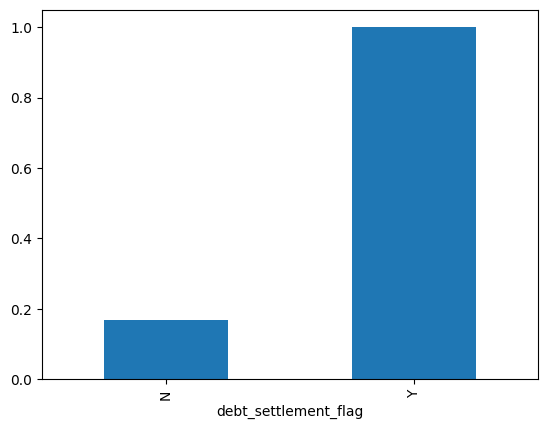

In [31]:
# Probabily a data-leakage here
df_train_proc.groupby('debt_settlement_flag')['default'].mean().plot.bar()

In [32]:
pd.options.display.max_colwidth = None
pd.options.display.max_rows = None
data_dict.loc[data_dict.column.isin(INTEGER_FEATURES), ['column', 'description']]

,column,description
0,id,A unique LC assigned ID for the loan listing.
2,funded_amnt,The total amount committed to that loan at that point in time.
4,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
23,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
25,fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.
26,fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
27,inq_last_6mths,The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
28,mths_since_last_delinq,The number of months since the borrower's last delinquency.
29,mths_since_last_record,The number of months since the last public record.
30,open_acc,The number of open credit lines in the borrower's credit file.


In [33]:
df_train_proc[INTEGER_FEATURES].nunique()

id                                    1583646
funded_amnt                              1563
term                                        2
delinq_2yrs                                34
fico_range_low                             40
fico_range_high                            40
inq_last_6mths                             10
mths_since_last_delinq                    168
mths_since_last_record                    124
open_acc                                   85
pub_rec                                    41
revol_bal                               89173
total_acc                                 145
collections_12_mths_ex_med                 17
mths_since_last_major_derog               179
policy_code                                 1
acc_now_delinq                              8
tot_coll_amt                            13911
tot_cur_bal                            426219
open_acc_6m                                20
open_act_il                                50
open_il_12m                       

 # Save Train and Test datasets

In [34]:
df_train_proc =  df_train_proc.drop(columns=['debt_settlement_flag'])
df_test_proc =  df_test_proc.drop(columns=['debt_settlement_flag'])

In [35]:
assert set(df_train_proc.columns) - set(df_test_proc.columns) == {'default'}

In [36]:
df_test_proc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538826 entries, 472065 to 1082981
Columns: 107 entries, id to sec_app_collections_12_mths_ex_med
dtypes: Int16(51), Int32(12), Int64(15), category(14), datetime64[ns](3), float32(12)
memory usage: 253.9 MB


In [37]:
df_train_proc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1583646 entries, 0 to 2925491
Columns: 108 entries, id to default
dtypes: Int16(51), Int32(12), Int64(15), category(14), datetime64[ns](3), float32(12), int64(1)
memory usage: 713.4 MB


In [38]:
df_train_proc.to_parquet('./case/data/processed/lending_club_case_train_dataset_v1.parquet')
df_test_proc.to_parquet('./case/data/processed/lending_club_case_test_dataset_v1.parquet')